In [1]:
import pandas as pd
import numpy as np
import itertools
import datetime
import matplotlib
import matplotlib.image as img
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline
matplotlib.rcParams.update({'font.size': 12})
matplotlib.rcParams.update({'figure.figsize': (12,6)})
matplotlib.rcParams["axes.grid"] = True

In [2]:
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('notebook')
sns.set_palette('muted')

In [3]:
import dill
dill._dill._reverse_typemap['ClassType'] = type
import cloudpickle

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, auc, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split

In [4]:
# Загрузим ранее сохранённые данные
X_test = pd.read_csv("X_test.csv")
y_test = pd.read_csv("y_test.csv")
X_test.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome
0,40,blue-collar,married,secondary,no,580,yes,no,unknown,16,may,1,-1,0,unknown
1,47,services,single,secondary,no,3644,no,no,unknown,9,jun,2,-1,0,unknown
2,25,student,single,tertiary,no,538,yes,no,cellular,20,apr,1,-1,0,unknown
3,42,management,married,tertiary,no,1773,no,no,cellular,9,apr,1,336,1,failure
4,56,management,married,tertiary,no,217,no,yes,cellular,21,jul,2,-1,0,unknown


In [5]:
# Загрузим Pipeline
with open('model_trained_LGB.dill', 'rb') as in_strm:
    pipeline = dill.load(in_strm)

In [6]:
y_pred = pipeline.predict(X_test)
y_prob = pipeline.predict_proba(X_test)

In [7]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.85      0.90      9950
           1       0.37      0.61      0.46      1353

    accuracy                           0.83     11303
   macro avg       0.65      0.73      0.68     11303
weighted avg       0.87      0.83      0.84     11303



In [10]:
# Установим порог вероятности на 0.65 - для максимизации F1-score
def calc_pred(x):
    return np.array([1 if x >= 0.65 else 0 for x in x])

y_pred_ = calc_pred(y_prob[:, 1])
print(classification_report(y_test, y_pred_))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93      9950
           1       0.47      0.52      0.50      1353

    accuracy                           0.87     11303
   macro avg       0.70      0.72      0.71     11303
weighted avg       0.88      0.87      0.88     11303



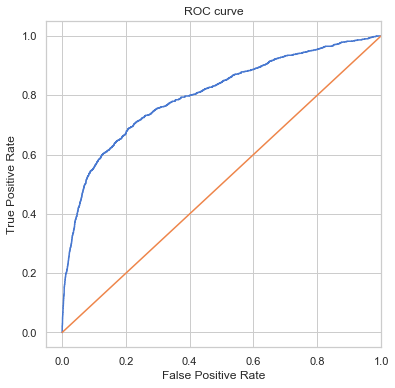

In [11]:
#sns.set(font_scale=1.2)
plt.figure(figsize=(6, 6))
fpr, tpr, thresholds = roc_curve(y_test, y_prob[:,1])
lw = 1.5
plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

#### На «новых» данных прогнозы (качество) не хуже, чем мы видели на cross-validation.

In [16]:
# Сохраним предсказания в файл CSV
pd.DataFrame({'index': X_test.index,
              'preds': y_pred_,
              'probs': y_prob[:, 1]}).to_csv("test_predictions.csv", index=False)